In [213]:
import os
import pandas as pd
import numpy as np

import csv
import glob
combined_data = {}

metric_targets = [ "inst_per_warp","dram_read_transactions", 
                  "gld_throughput", "l2_write_transactions",
                  "warp_nonpred_execution_efficiency",
                  "l2_tex_read_hit_rate","ipc",
                 "l2_tex_write_transactions","l2_read_transactions",
                 "inst_per_warp","shared_store_transactions",
                 "shared_load_transactions","gld_transactions","global_hit_rate",
                 "dram_write_throughput","tex_cache_throughput","l2_tex_read_throughput",
                 "l2_tex_write_throughput","l2_read_throughput","l2_write_throughput"]
bench_targets = [ "gaussian" ,"gemm" ]

for filen_ in glob.glob("/home/yzamora/power/nvidia_gpus/all_apps/gemm_results/*.csv"):
    
    filen = os.path.basename(filen_)
    
    filen_split = filen.split('.')[0].split('_')
    bench_name = filen_split[0]
    #metric_name = filen_split[1]
    #print(filen_split)
    size_str = filen_split[1].split('N')[1]
    
    #if not (metric_name in metric_targets): continue
    if not (bench_name in bench_targets): continue
    
    key_root = bench_name+"_"+size_str
    #print(key_root)
    
    # Now open the file and look for the data
    with open(filen_ ,'r') as file_handle:
        
        data_found = False
        ncols = 1
        fdata = csv.reader(file_handle)
        index_lookup = {}
        
        for line_split in fdata:
            print(line_split)
            lsplt = (len(line_split) > 0)

            if data_found:
                
                if lsplt and len(line_split) == ncols:
                    #percent - strip off end
                    # Get metric name here
                    mname_index = index_lookup['Metric Name']
                    metric_name = line_split[ mname_index ]
                    if not (metric_name in metric_targets): continue
                    
                    # Read in desired value for the current metric
                    target_index = index_lookup['Avg']; value = 0

                    # integer value
                    if metric_name in ["l2_tex_write_transactions","shared_store_transactions","shared_load_transactions",
                                      "gld_transactions","l2_read_transactions","l2_write_transactions","dram_read_transactions"]:
                        value = int(line_split[ target_index ])
                        
                    # Labeled with percentage
                    elif metric_name in [ "warp_nonpred_execution_efficiency","l2_tex_read_hit_rate","global_hit_rate" ]:
                        # Just take the first 7 chars and convert to fraction
                        value = float(line_split[ target_index ][0:7]) / 100.0
                        
                    # Labeled with bandwidth units
                    elif metric_name in [ "write", "read", "gld_throughput","dram_write_throughput","tex_cache_throughput",
                                        "l2_tex_read_throughput","l2_tex_write_throughput","l2_read_throughput","l2_write_throughput"]:
                        # Just take the first 
                        units = line_split[ target_index ][-4:-2]
                        mfact = 1.0
                        if   units == "KB": mfact = 1024
                        elif units == "MB": mfact = 1024*1024
                        elif units == "GB": mfact = 1024*1024*1024
                        value = float(line_split[ target_index ][0:7]) * mfact
                    
                    # otherwise, float
                    else:
                        value = float(line_split[ target_index ])
                    
                    # Parse name of kernel
                    kernel_name = line_split[ index_lookup['Kernel'] ].split('(')[0]
                    
                    # Define kernel-specific key
                    key = key_root + "_" + kernel_name
                    
                    # Initialize dict for this key, if it is new
                    if not (key in combined_data): 
                        combined_data [ key ] = {}
                        combined_data [ key ][ 'size' ] = int( size_str )
                    
                    # Store value for the metric being read right now
                    combined_data [ key ][ metric_name ] = value
                    
                else: data_found = False


            elif lsplt and line_split[0] == 'Device' and line_split[1] == 'Kernel':
                # Set flag that we are at the data:
                data_found = True
                # Set number of columns in table:
                ncols = len(line_split)
                # Generate an index lookup table:
                idx = 0
                for term in line_split:
                    index_lookup[term] = idx
                    idx += 1
                    
#print(combined_data)

[]
['cublasSgemm test result:']
[]
['running with min_m_k_n: 2 max_m_k_n: 16384 repeats: 10']
['==31333== NVPROF is profiling process 31333', ' command: ./gemm 128']
['allocating device variables']
['==31333== Some kernel(s) will be replayed on device 0 in order to collect all events/metrics.']
['float32: size 128 average: 1.47094 s ']
['==31333== Profiling application: ./gemm 128']
['==31333== Profiling result:']
['==31333== Metric result:']
['Device', 'Kernel', 'Invocations', 'Metric Name', 'Metric Description', 'Min', 'Max', 'Avg']
['Tesla P100-PCIE-16GB (0)', 'sgemm_32x32x32_NN_vec', '10', 'inst_per_warp', 'Instructions per warp', '1665.000000', '1665.000000', '1665.000000']
['Tesla P100-PCIE-16GB (0)', 'sgemm_32x32x32_NN_vec', '10', 'branch_efficiency', 'Branch Efficiency', '100.000000%', '100.000000%', '100.000000%']
['Tesla P100-PCIE-16GB (0)', 'sgemm_32x32x32_NN_vec', '10', 'warp_execution_efficiency', 'Warp Execution Efficiency', '100.000000%', '100.000000%', '100.000000%']
['

['==31589== Metric result:']
['Device', 'Kernel', 'Invocations', 'Metric Name', 'Metric Description', 'Min', 'Max', 'Avg']
['Tesla P100-PCIE-16GB (0)', 'sgemm_128x128x8_NN_vec', '10', 'inst_per_warp', 'Instructions per warp', '111014.000000', '111014.000000', '111014.000000']
['Tesla P100-PCIE-16GB (0)', 'sgemm_128x128x8_NN_vec', '10', 'branch_efficiency', 'Branch Efficiency', '100.000000%', '100.000000%', '100.000000%']
['Tesla P100-PCIE-16GB (0)', 'sgemm_128x128x8_NN_vec', '10', 'warp_execution_efficiency', 'Warp Execution Efficiency', '100.000000%', '100.000000%', '100.000000%']
['Tesla P100-PCIE-16GB (0)', 'sgemm_128x128x8_NN_vec', '10', 'warp_nonpred_execution_efficiency', 'Warp Non-Predicated Execution Efficiency', '99.057776%', '99.057776%', '99.057776%']
['Tesla P100-PCIE-16GB (0)', 'sgemm_128x128x8_NN_vec', '10', 'inst_replay_overhead', 'Instruction Replay Overhead', '0.000025', '0.000028', '0.000026']
['Tesla P100-PCIE-16GB (0)', 'sgemm_128x128x8_NN_vec', '10', 'shared_load_t

['Tesla P100-PCIE-16GB (0)', 'sgemm_128x128x8_NN_vec', '10', 'stall_other', 'Issue Stall Reasons (Other)', '18.724689%', '19.011200%', '18.858192%']
['Tesla P100-PCIE-16GB (0)', 'sgemm_128x128x8_NN_vec', '10', 'stall_constant_memory_dependency', 'Issue Stall Reasons (Immediate constant)', '0.008535%', '0.011622%', '0.008896%']
['Tesla P100-PCIE-16GB (0)', 'sgemm_128x128x8_NN_vec', '10', 'stall_pipe_busy', 'Issue Stall Reasons (Pipe Busy)', '0.445768%', '0.487560%', '0.462642%']
['Tesla P100-PCIE-16GB (0)', 'sgemm_128x128x8_NN_vec', '10', 'shared_efficiency', 'Shared Memory Efficiency', '44.677505%', '44.677505%', '44.677505%']
['Tesla P100-PCIE-16GB (0)', 'sgemm_128x128x8_NN_vec', '10', 'inst_fp_32', 'FP Instructions(Single)', '22346705920', '22346705920', '22346705920']
['Tesla P100-PCIE-16GB (0)', 'sgemm_128x128x8_NN_vec', '10', 'inst_fp_64', 'FP Instructions(Double)', '0', '0', '0']
['Tesla P100-PCIE-16GB (0)', 'sgemm_128x128x8_NN_vec', '10', 'inst_integer', 'Integer Instructions', 

['Tesla P100-PCIE-16GB (0)', 'sgemm_128x128x8_NN_vec', '10', 'local_load_transactions_per_request', 'Local Memory Load Transactions Per Request', '0.000000', '0.000000', '0.000000']
['Tesla P100-PCIE-16GB (0)', 'sgemm_128x128x8_NN_vec', '10', 'local_store_transactions_per_request', 'Local Memory Store Transactions Per Request', '0.000000', '0.000000', '0.000000']
['Tesla P100-PCIE-16GB (0)', 'sgemm_128x128x8_NN_vec', '10', 'gld_transactions_per_request', 'Global Load Transactions Per Request', '10.251716', '10.251716', '10.251716']
['Tesla P100-PCIE-16GB (0)', 'sgemm_128x128x8_NN_vec', '10', 'gst_transactions_per_request', 'Global Store Transactions Per Request', '4.000000', '4.000000', '4.000000']
['Tesla P100-PCIE-16GB (0)', 'sgemm_128x128x8_NN_vec', '10', 'shared_store_transactions', 'Shared Store Transactions', '44609600', '44609600', '44609600']
['Tesla P100-PCIE-16GB (0)', 'sgemm_128x128x8_NN_vec', '10', 'shared_load_transactions', 'Shared Load Transactions', '352172800', '352172

['Tesla P100-PCIE-16GB (0)', 'sgemm_128x128x8_NN_vec', '10', 'inst_compute_ld_st', 'Load/Store Instructions', '15638221824', '15638221824', '15638221824']
['Tesla P100-PCIE-16GB (0)', 'sgemm_128x128x8_NN_vec', '10', 'inst_misc', 'Misc Instructions', '1238317056', '1238317056', '1238317056']
['Tesla P100-PCIE-16GB (0)', 'sgemm_128x128x8_NN_vec', '10', 'inst_inter_thread_communication', 'Inter-Thread Instructions', '0', '0', '0']
['Tesla P100-PCIE-16GB (0)', 'sgemm_128x128x8_NN_vec', '10', 'issue_slots', 'Issue Slots', '6590017302', '6590019603', '6590018416']
['Tesla P100-PCIE-16GB (0)', 'sgemm_128x128x8_NN_vec', '10', 'cf_issued', 'Issued Control-Flow Instructions', '12746784', '12746784', '12746784']
['Tesla P100-PCIE-16GB (0)', 'sgemm_128x128x8_NN_vec', '10', 'cf_executed', 'Executed Control-Flow Instructions', '12746784', '12746784', '12746784']
['Tesla P100-PCIE-16GB (0)', 'sgemm_128x128x8_NN_vec', '10', 'ldst_issued', 'Issued Load/Store Instructions', '629213760', '629213760', '62

[]
['cublasSgemm test result:']
[]
['running with min_m_k_n: 2 max_m_k_n: 16384 repeats: 10']
['==604== NVPROF is profiling process 604', ' command: ./gemm 7552']
['allocating device variables']
['==604== Some kernel(s) will be replayed on device 0 in order to collect all events/metrics.']
['float32: size 7552 average: 63.4583 s ']
['==604== Profiling application: ./gemm 7552']
['==604== Profiling result:']
['==604== Metric result:']
['Device', 'Kernel', 'Invocations', 'Metric Name', 'Metric Description', 'Min', 'Max', 'Avg']
['Tesla P100-PCIE-16GB (0)', 'sgemm_128x128x8_NN_vec', '10', 'inst_per_warp', 'Instructions per warp', '542662.000000', '542662.000000', '542662.000000']
['Tesla P100-PCIE-16GB (0)', 'sgemm_128x128x8_NN_vec', '10', 'branch_efficiency', 'Branch Efficiency', '100.000000%', '100.000000%', '100.000000%']
['Tesla P100-PCIE-16GB (0)', 'sgemm_128x128x8_NN_vec', '10', 'warp_execution_efficiency', 'Warp Execution Efficiency', '100.000000%', '100.000000%', '100.000000%']
['

['Tesla P100-PCIE-16GB (0)', 'sgemm_128x128x8_NN_vec', '10', 'stall_texture', 'Issue Stall Reasons (Texture)', '0.000071%', '0.000129%', '0.000100%']
['Tesla P100-PCIE-16GB (0)', 'sgemm_128x128x8_NN_vec', '10', 'stall_sync', 'Issue Stall Reasons (Synchronization)', '13.531489%', '13.559472%', '13.547904%']
['Tesla P100-PCIE-16GB (0)', 'sgemm_128x128x8_NN_vec', '10', 'stall_other', 'Issue Stall Reasons (Other)', '19.347657%', '19.427208%', '19.373670%']
['Tesla P100-PCIE-16GB (0)', 'sgemm_128x128x8_NN_vec', '10', 'stall_constant_memory_dependency', 'Issue Stall Reasons (Immediate constant)', '0.000508%', '0.000682%', '0.000551%']
['Tesla P100-PCIE-16GB (0)', 'sgemm_128x128x8_NN_vec', '10', 'stall_pipe_busy', 'Issue Stall Reasons (Pipe Busy)', '0.413341%', '0.415183%', '0.414464%']
['Tesla P100-PCIE-16GB (0)', 'sgemm_128x128x8_NN_vec', '10', 'shared_efficiency', 'Shared Memory Efficiency', '44.515006%', '44.515006%', '44.515006%']
['Tesla P100-PCIE-16GB (0)', 'sgemm_128x128x8_NN_vec', '1

                                    size  inst_per_warp  \
gemm_10112_sgemm_128x128x8_NN_vec  10112  726342.000000   
gemm_10240_sgemm_128x128x8_NN_vec  10240  735526.000000   
gemm_1024_maxwell_sgemm_128x64_nn   1024   38856.096094   
gemm_10368_sgemm_128x128x8_NN_vec  10368  744710.000000   
gemm_1152_maxwell_sgemm_128x64_nn   1152   29509.467284   

                                   warp_nonpred_execution_efficiency  \
gemm_10112_sgemm_128x128x8_NN_vec                           0.991180   
gemm_10240_sgemm_128x128x8_NN_vec                           0.991181   
gemm_1024_maxwell_sgemm_128x64_nn                           0.995702   
gemm_10368_sgemm_128x128x8_NN_vec                           0.991183   
gemm_1152_maxwell_sgemm_128x64_nn                           0.994771   

                                   shared_store_transactions  \
gemm_10112_sgemm_128x128x8_NN_vec                  508466752   
gemm_10240_sgemm_128x128x8_NN_vec                  527974400   
gemm_1024_maxwell_sg

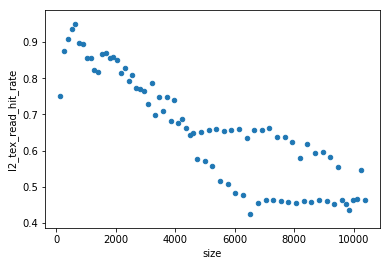

In [21]:
import pandas as pd
%matplotlib inline
df = pd.DataFrame.from_dict(combined_data,orient="index")
print (df.head())

df.plot(x='size', y='l2_tex_read_hit_rate', kind='scatter')

## Going through all metrics to check whether significant (not 0) --September 6, 2018

In [9]:
## Prepping files - Removing random data 
import re
import csv
import os
import glob

for filen_ in glob.glob("/home/yzamora/power/nvidia_gpus/all_apps/gaussian_results/*.csv"):
    cmd = "tr -cd \'\\11\\12\\15\\40-\\176\' < "+filen_ +" >"+ filen_+".temp"
    cmd2 = "mv " + filen_ + ".temp " + filen_
    os.system( cmd )
    os.system(cmd2)
#string = open("/home/yzamora/power/nvidia_gpus/all_apps/gaussian_results/gaussian_N1024.csv").read()
#new_str = re.sub('[^a-zA-Z0-9\n\.]', ' ', string)
#open('b.txt', 'w').write(new_str)

#txt_file = r"b.txt"
#csv_file = r"mycsv.csv"
#in_txt = csv.reader(open(txt_file,"r"),delimiter =' ')
#out_csv = csv.writer(open(csv_file, 'w'))
#out_csv.writerows(in_txt)

In [75]:
%load_ext autoreload
%autoreload 2
from __future__ import absolute_import

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [315]:

import os
import sys
import pandas as pd
%matplotlib inline

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from all_apps import sweep_an
#stream_data = {}
combined_data_ = sweep_an.all_st()
print(stream_data)


#df.plot(x='size', y='dram_read_transactions', kind='scatter')

{'stream_128_set_array': {'size': 128, 'inst_per_warp': 18.0, 'branch_efficiency': 1.0, 'warp_execution_efficiency': 1.0, 'warp_nonpred_execution_efficiency': 0.9444440000000001, 'inst_replay_overhead': 0.111111, 'shared_load_transactions_per_request': 0.0, 'shared_store_transactions_per_request': 0.0, 'local_load_transactions_per_request': 0.0, 'local_store_transactions_per_request': 0.0, 'gld_transactions_per_request': 0.0, 'gst_transactions_per_request': 4.0, 'shared_store_transactions': 0, 'shared_load_transactions': 0, 'local_load_transactions': 0, 'local_store_transactions': 0, 'gld_transactions': 0, 'gst_transactions': 16, 'sysmem_read_transactions': 0, 'sysmem_write_transactions': 5, 'l2_read_transactions': 24, 'l2_write_transactions': 29, 'dram_read_transactions': 0, 'dram_write_transactions': 1, 'global_hit_rate': 0.0, 'local_hit_rate': 0.0, 'gld_requested_throughput': 0.0, 'gst_requested_throughput': 208073129.984, 'gld_throughput': 0.0, 'gst_throughput': 208073129.984, 'loc

In [103]:
df = pd.DataFrame.from_dict(combined_data_,orient="index")
#print (df.head())

In [316]:
#Going through metrics
import numbers
import glob
import os
import csv

#combined_data_ = {}

metric_targets = []
all_sig_metrics = []
bench_targets = [ "gaussian" ,"gemm", "stream" ]
for filen_ in glob.glob("/home/yzamora/power/nvidia_gpus/all_apps/all_results/*.csv"):
#for filen_ in glob.glob("/home/yzamora/power/nvidia_gpus/all_apps/gaussian_results/*.csv"):
    filen = os.path.basename(filen_)
    #print (filen)
    filen_split = filen.split('.')[0].split('_')
    bench_name = filen_split[0]
    #metric_name = filen_split[1]
    #print(filen_split)
    size_str = filen_split[1].split('N')[1]
    
    #if not (metric_name in metric_targets): continue
    if not (bench_name in bench_targets): continue
    
    key_root = bench_name+"_"+size_str
    #print(key_root)
    levels = ["Idle", "Low","High", "Max"]
    bw_units = ["GB", "MB", "KB" ,"0B"]
    # Now open the file and look for the data
    with open(filen_ ,'r') as file_handle:
        #print (file_handle)
        data_found = False
        ncols = 1
        fdata = csv.reader(file_handle)
        index_lookup = {}
        #print(filen_)
        for line_split in fdata:
            #print (line_split)
            lsplt = (len(line_split) > 0)
      
            if data_found:
                #print("data found")
                if lsplt and len(line_split) == ncols:
                    #percent - strip off end
                    # Get metric name here
                    #mname_index = index_lookup['Metric Name']
                    #metric_name = line_split[ mname_index ]
                    #if not (metric_name in metric_targets): continue
                    
                    # Read in desired value for the current metric
                    target_index = index_lookup['Avg']; value = 0
                    metric_name = line_split[index_lookup['Metric Name']]
                    #print (line_split[target_index].isdecimal())
                    if line_split[target_index].isdecimal():
                        if line_split[target_index]!= '0':
                            #print(line_split[target_index])
                            all_sig_metrics.append(metric_name)
                            value = int(line_split[ target_index ])
                        
                        # Labeled with percentage
                    elif "%" == line_split[target_index][-1]:
                        #print ("percentage loop")
                        all_sig_metrics.append(metric_name)
                        value = float(line_split[ target_index ][0:7]) / 100.0
                        
                    # Labeled with bandwidth units
                    elif line_split[ target_index ][-4:-2] in bw_units:
                        # Just take the first 
                        units = line_split[ target_index ][-4:-2]
                        all_sig_metrics.append(metric_name)
                        mfact = 1.0
                        if   units == "KB": mfact = 1024
                        elif units == "MB": mfact = 1024*1024
                        elif units == "GB": mfact = 1024*1024*1024
                        elif units == "0B":  mfact = 1
                        value = float(line_split[ target_index ][0:7]) * mfact
                    
                    # idle, low, max
                    elif line_split[ target_index ][-1] == ")":
                        #print ("low")
                        all_sig_metrics.append(metric_name)
                        value = int(line_split[ target_index].split('(')[1].split(")")[0])
                        
                    # otherwise, float
                    #elif not(float(line_split[ target_index ]).is_integer()):
                    else:
                        #print(line_split[ target_index ].split('(')[0])
                        #print("in float")
                        #print(line_split[ target_index ].split('(')[0])
                        value = float(line_split[ target_index ])
                    
                    
                    
                    # Parse name of kernel
                    kernel_name = line_split[ index_lookup['Kernel'] ].split('(')[0]
                    
                    # Define kernel-specific key
                    key = key_root + "_" + kernel_name
                    
                    # Initialize dict for this key, if it is new
                    if not (key in combined_data_): 
                        combined_data_ [ key ] = {}
                        combined_data_ [ key ][ 'size' ] = int( size_str )
                        
                    # Store value for the metric being read right now
                    combined_data_ [ key ][ metric_name ] = value
                    
                else: data_found = False


            elif lsplt and line_split[0] == 'Device' and line_split[1] == 'Kernel':
                # Set flag that we are at the data:
                data_found = True
                # Set number of columns in table:
                ncols = len(line_split)
                # Generate an index lookup table:
                idx = 0
                for term in line_split:
                    index_lookup[term] = idx
                    idx += 1
                #print(index_lookup)
print(combined_data_)


{'stream_128_set_array': {'size': 128, 'inst_per_warp': 18.0, 'branch_efficiency': 1.0, 'warp_execution_efficiency': 1.0, 'warp_nonpred_execution_efficiency': 0.9444440000000001, 'inst_replay_overhead': 0.111111, 'shared_load_transactions_per_request': 0.0, 'shared_store_transactions_per_request': 0.0, 'local_load_transactions_per_request': 0.0, 'local_store_transactions_per_request': 0.0, 'gld_transactions_per_request': 0.0, 'gst_transactions_per_request': 4.0, 'shared_store_transactions': 0, 'shared_load_transactions': 0, 'local_load_transactions': 0, 'local_store_transactions': 0, 'gld_transactions': 0, 'gst_transactions': 16, 'sysmem_read_transactions': 0, 'sysmem_write_transactions': 5, 'l2_read_transactions': 24, 'l2_write_transactions': 29, 'dram_read_transactions': 0, 'dram_write_transactions': 1, 'global_hit_rate': 0.0, 'local_hit_rate': 0.0, 'gld_requested_throughput': 0.0, 'gst_requested_throughput': 208073129.984, 'gld_throughput': 0.0, 'gst_throughput': 208073129.984, 'loc

                    size  inst_per_warp  branch_efficiency  \
gaussian_1024_Fan1  1024      33.151515           0.999903   
gaussian_1024_Fan2  1024      27.771998           1.000000   
gaussian_1152_Fan1  1152      27.809948           0.999916   
gaussian_1152_Fan2  1152      27.760276           1.000000   
gaussian_1280_Fan1  1280      29.516158           0.999929   

                    warp_execution_efficiency  \
gaussian_1024_Fan1                   0.977705   
gaussian_1024_Fan2                   0.498486   
gaussian_1152_Fan1                   0.982889   
gaussian_1152_Fan2                   0.498654   
gaussian_1280_Fan1                   0.983698   

                    warp_nonpred_execution_efficiency  inst_replay_overhead  \
gaussian_1024_Fan1                           0.950647              0.148065   
gaussian_1024_Fan2                           0.485504              0.001007   
gaussian_1152_Fan1                           0.958649              0.168038   
gaussian_1152_Fa

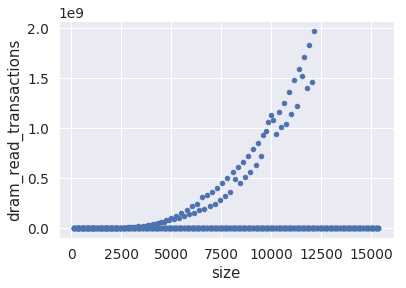

In [317]:
import pandas as pd
%matplotlib inline
df = pd.DataFrame.from_dict(combined_data_,orient="index")
print (df.head())

df.plot(x='size', y='dram_read_transactions', kind='scatter')


In [114]:
#kernels - STREAM_Scale, STREAM_Triad, set_array, STREAM_Scale, STREAM_Copy, STREAM_Add
executable = "stream"
for file in glob.glob("/home/yzamora/power/nvidia_gpus/all_apps/stream_results/*.csv"):
    #nf = "gaussian_N128.csv"
    nf = os.path.basename(file)
    filesplt = os.path.basename(nf).split(".")[0].split('N')[1]
    filename = executable + "_" + filesplt
    #print(filename)
    for key, value in combined_data_.items():
        #print(key)
        if filename in key:
            with open(file) as results:
                for i,l in enumerate(results):
                    if i < 13:
                        if "Copy" in l and "Copy" in key: 
                            #combined_data_[key]["Time(s)"] = 
                            combined_data_[key]["Time(s)"] = float((l.split(":")[1]).split()[1])
                        elif "Scale" in l and "Scale" in key:
                            combined_data_[key]["Time(s)"] = float((l.split(":")[1]).split()[1])
                        elif "Add" in l and "Add" in key:
                            combined_data_[key]["Time(s)"] = float((l.split(":")[1]).split()[1])
                        elif "Triad" in l and "Triad" in key:
                            combined_data_[key]["Time(s)"] = float((l.split(":")[1]).split()[1])
    print (combined_data_)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [319]:
executable = "gaussian"
for file in glob.glob("/home/yzamora/power/nvidia_gpus/all_apps/gaussian_time_timing/*.csv"):
    #nf = "gaussian_N128.csv"
    nf = os.path.basename(file)
    filesplt = os.path.basename(nf).split(".")[0].split('N')[1]
    filename = executable + "_" + filesplt
    #print(filename)
    for key, value in combined_data_.items():
        #print(key)
        if filename in key:
            with open(file) as results:
                for l in results:
                    if "Time for CUDA kernel 1" in l:
                        #print("in kern")
                        combined_data_[key]["Time(s)"] = float(l.split(":")[1].split()[0])
                
#print(combined_data_)

In [320]:
#gemm_N128.csv
executable = "gemm_"
for file in glob.glob("/home/yzamora/power/nvidia_gpus/all_apps/gemm_timing/*.csv"):
    #print (file)
    filesplt = os.path.basename(file).split(".")[0].split('N')[1]
    filen = executable + filesplt +"_sge"
    #print(filen)
    for key, value in combined_data_.items():      
        if filen in key:
            with open(file) as results:
                for l in results:
                    if "average" in l:
                        combined_data_[key]["Time(s)"] = float(l.split(":")[2].split()[0])
#print(combined_data_)

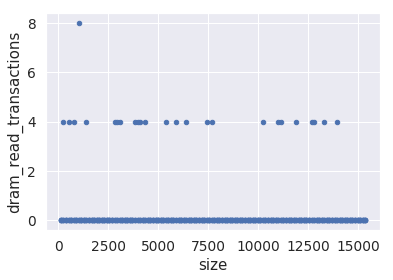

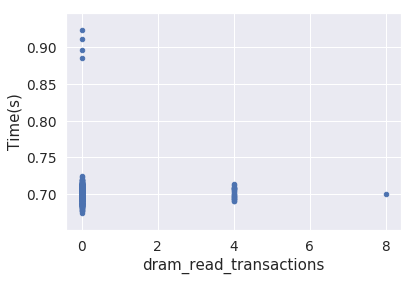

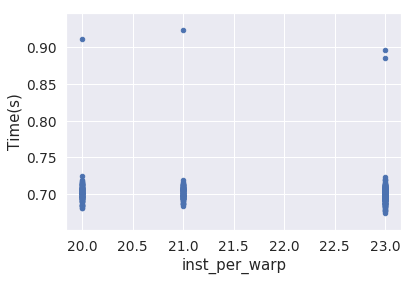

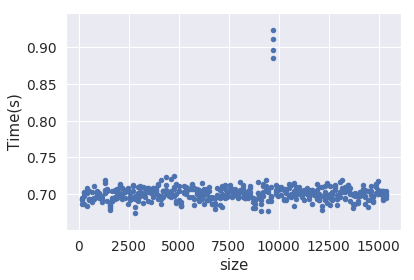

In [321]:
#Simple analysis of data
import pandas as pd
%matplotlib inline
#stream_data
#df = pd.DataFrame.from_dict(combined_data_,orient="index")
df = pd.DataFrame.from_dict(stream_data,orient="index")

df = df.dropna()
#print(df['Time(s)'])

#print (df.head())

df.plot(x='size', y='dram_read_transactions', kind='scatter')
df.plot(x='dram_read_transactions', y='Time(s)', kind='scatter')
df.plot(x='inst_per_warp', y='Time(s)', kind='scatter')
df.plot(x='size', y='Time(s)', kind='scatter')

In [322]:
import pandas as pd
%matplotlib inline


df = pd.DataFrame.from_dict(combined_data_,orient="index")
display(df.head())
#df["Time(s)"]

#df.plot(x='size', y='l2_tex_read_hit_rate', kind='scatter')

size  inst_per_warp  branch_efficiency  \
gaussian_1024_Fan1  1024      33.151515           0.999903   
gaussian_1024_Fan2  1024      27.771998           1.000000   
gaussian_1152_Fan1  1152      27.809948           0.999916   
gaussian_1152_Fan2  1152      27.760276           1.000000   
gaussian_1280_Fan1  1280      29.516158           0.999929   

                    warp_execution_efficiency  \
gaussian_1024_Fan1                   0.977705   
gaussian_1024_Fan2                   0.498486   
gaussian_1152_Fan1                   0.982889   
gaussian_1152_Fan2                   0.498654   
gaussian_1280_Fan1                   0.983698   

                    warp_nonpred_execution_efficiency  inst_replay_overhead  \
gaussian_1024_Fan1                           0.950647              0.148065   
gaussian_1024_Fan2                           0.485504              0.001007   
gaussian_1152_Fan1                           0.958649              0.168038   
gaussian_1152_Fan2                           0.485668              0.000818   
gaussian_1280_Fan1                           0.958356              0.160663   

                    shared_load_transactions_per_request  \
gaussian_1024_Fan1                                   0.0   
gaussian_1024_Fan2                                   0.0   
gaussian_1152_Fan1                                   0.0   
gaussian_1152_Fan2                                   0.0   
gaussian_1280_Fan1                                   0.0   

                    shared_store_transactions_per_request  \
gaussian_1024_Fan1                                    0.0   
gaussian_1024_Fan2                                    0.0   
gaussian_1152_Fan1                                    0.0   
gaussian_1152_Fan2                                    0.0   
gaussian_1280_Fan1                                    0.0   

                    local_load_transactions_per_request  \
gaussian_1024_Fan1                                  0.0   
gaussian_1024_Fan2                                  0.0   
gaussian_1152_Fan1                                  0.0   
gaussian_1152_Fan2                                  0.0   
gaussian_1280_Fan1                                  0.0   

                    local_store_transactions_per_request    ...     \
gaussian_1024_Fan1                                   0.0    ...      
gaussian_1024_Fan2                                   0.0    ...      
gaussian_1152_Fan1                                   0.0    ...      
gaussian_1152_Fan2                                   0.0    ...      
gaussian_1280_Fan1                                   0.0    ...      

                    special_fu_utilization  half_precision_fu_utilization  \
gaussian_1024_Fan1                       1                              0   
gaussian_1024_Fan2                       0                              0   
gaussian_1152_Fan1                       1                              0   
gaussian_1152_Fan2                       0                              0   
gaussian_1280_Fan1                       1                              0   

                    single_precision_fu_utilization  \
gaussian_1024_Fan1                                1   
gaussian_1024_Fan2                                1   
gaussian_1152_Fan1                                1   
gaussian_1152_Fan2                                1   
gaussian_1280_Fan1                                1   

                    double_precision_fu_utilization  flop_hp_efficiency  \
gaussian_1024_Fan1                                0                 0.0   
gaussian_1024_Fan2                                0                 0.0   
gaussian_1152_Fan1                                0                 0.0   
gaussian_1152_Fan2                                0                 0.0   
gaussian_1280_Fan1                                0                 0.0   

                    flop_sp_efficiency  flop_dp_efficiency  \
gaussian_1024_Fan1            0.000137                 0.0   
gaus

# Further analysis of data - Random forest model, correlation graph, prediction graph

size                                     0.350447
inst_per_warp                           -0.608651
branch_efficiency                        0.282718
warp_execution_efficiency                0.418522
warp_nonpred_execution_efficiency        0.286639
inst_replay_overhead                     0.657293
shared_load_transactions_per_request    -0.746547
shared_store_transactions_per_request   -0.732503
local_load_transactions_per_request           NaN
local_store_transactions_per_request          NaN
gld_transactions_per_request            -0.632585
gst_transactions_per_request            -0.476210
shared_store_transactions               -0.422449
shared_load_transactions                -0.421852
local_load_transactions                       NaN
local_store_transactions                      NaN
gld_transactions                        -0.421992
gst_transactions                        -0.512828
sysmem_read_transactions                      NaN
sysmem_write_transactions                     NaN


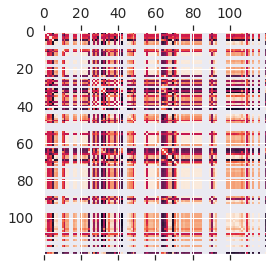

In [323]:
import matplotlib.pyplot as plt
plt.matshow(df.corr())
print(df.corr()["Time(s)"])

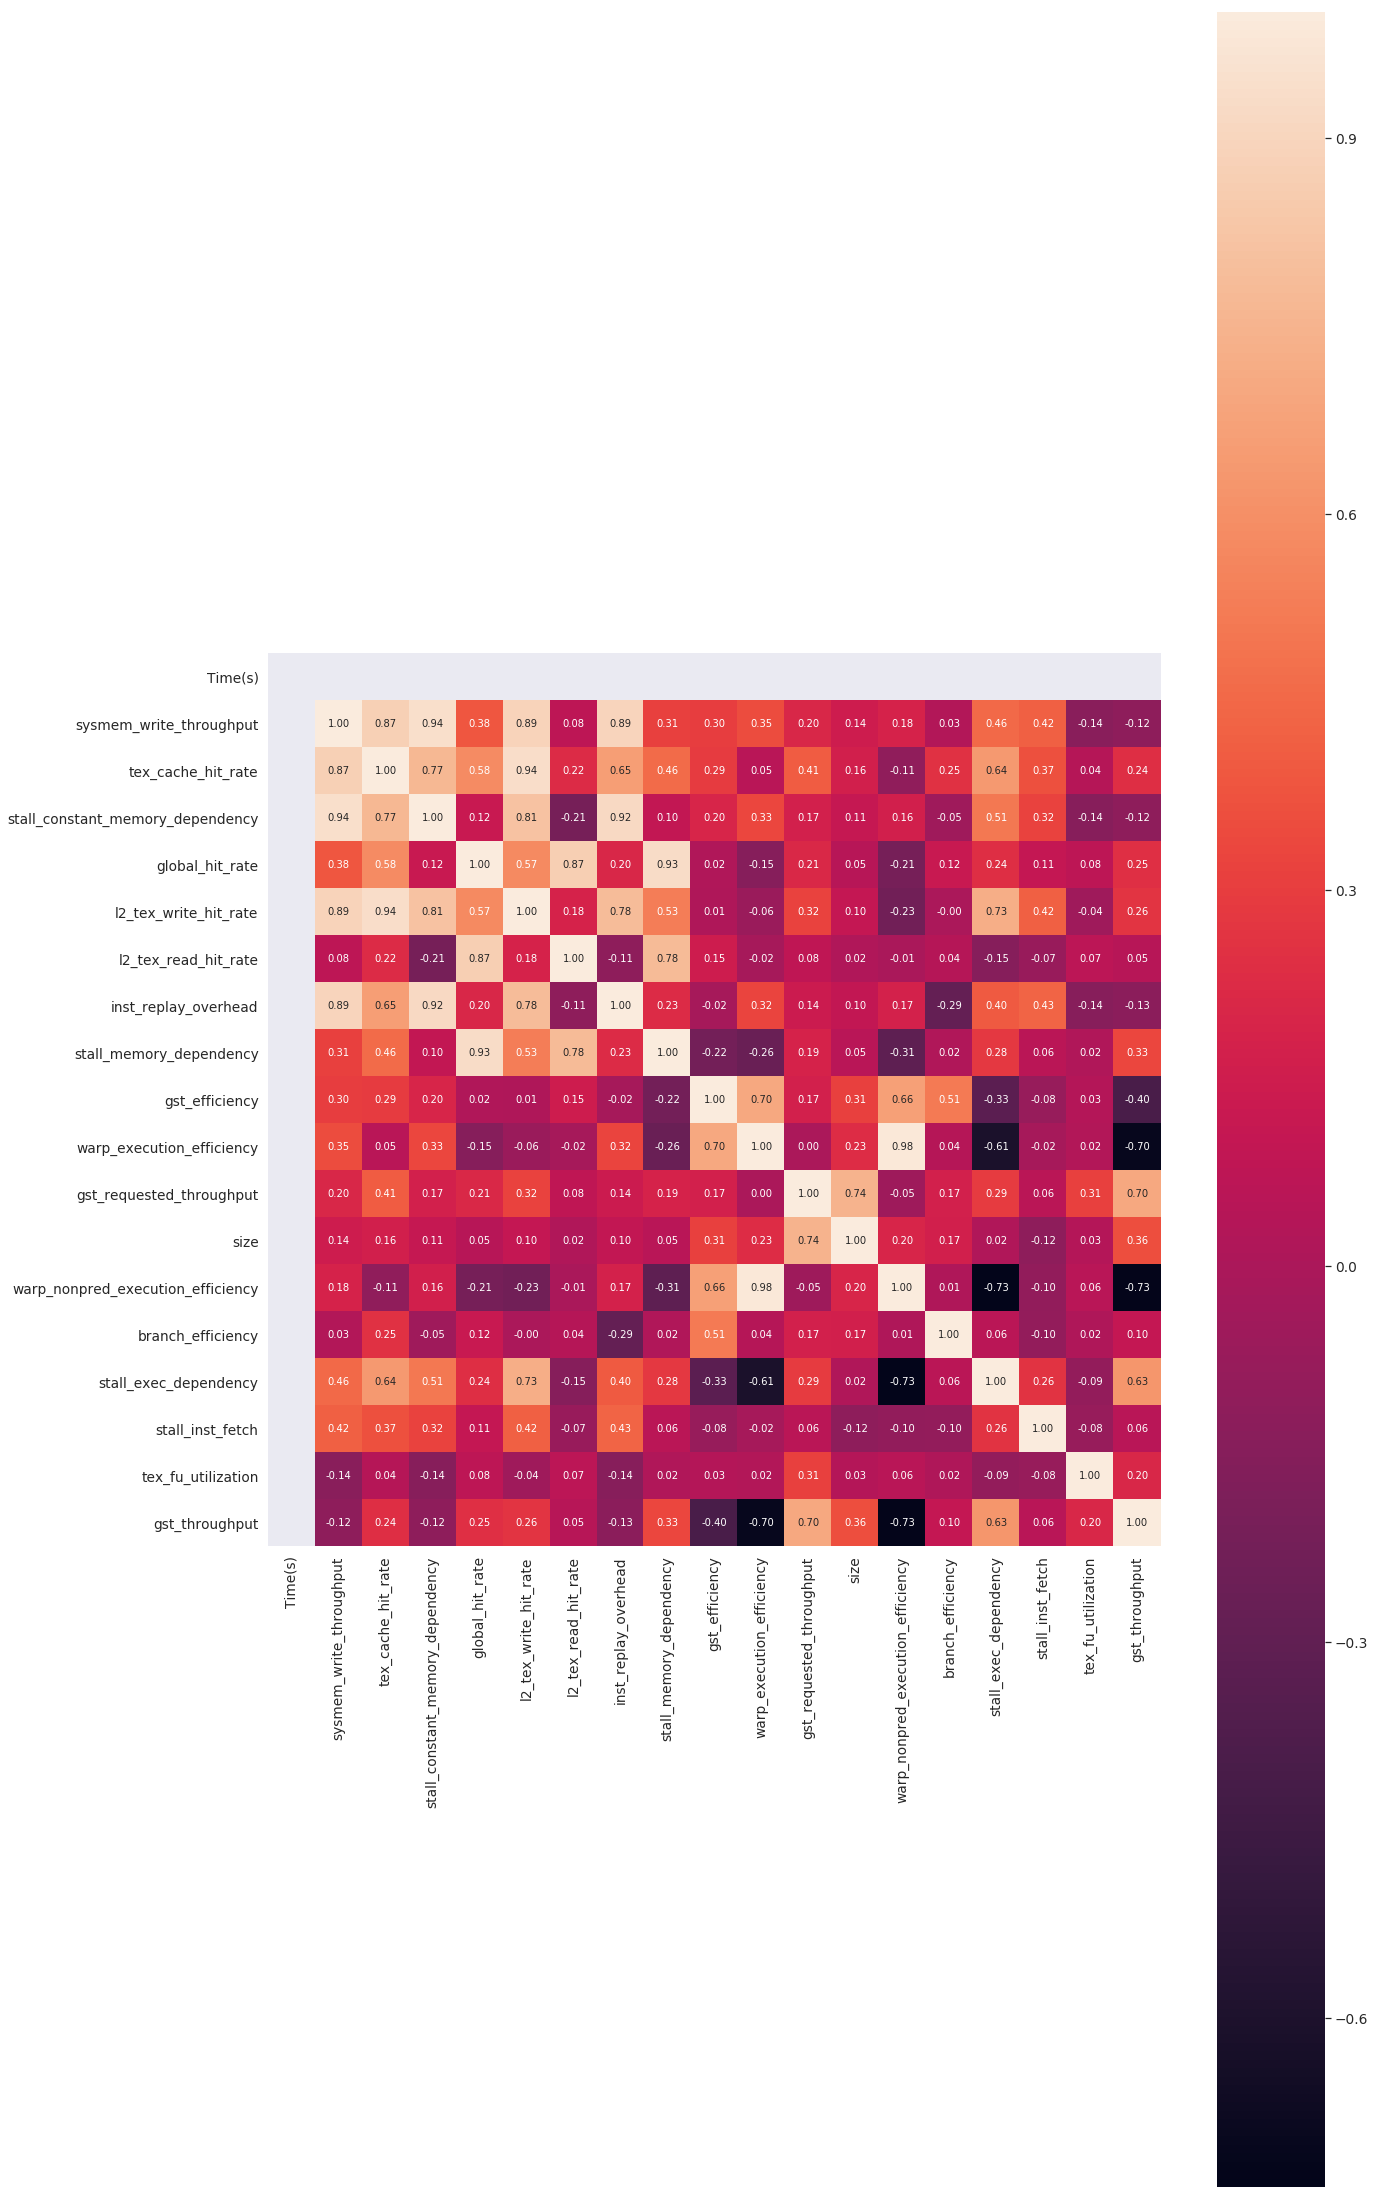

In [325]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import random
corrmat = df.corr()
k = 19
cols = corrmat.nlargest(k, "Time(s)")["Time(s)"].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.rcParams['figure.figsize'] = [20, 40]
plt.show()

# Random Forest Model

### Cleaning up data, converting to dictionary to dataframe, running RF grid search 

In [326]:
import pandas as  pd
import numpy  as  np
import matplotlib.pyplot  as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
import scipy as sp
import pickle as pkl
%matplotlib inline

In [327]:
df = df.dropna()
X  =  df[['inst_per_warp','size','branch_efficiency','warp_execution_efficiency','warp_nonpred_execution_efficiency']]
y = df['Time(s)']

print (df)
print ("X size:", X.shape)
print ('y size:', y.shape)

                          size  inst_per_warp  branch_efficiency  \
gaussian_1024_Fan1        1024      33.151515           0.999903   
gaussian_1024_Fan2        1024      27.771998           1.000000   
gaussian_1152_Fan1        1152      27.809948           0.999916   
gaussian_1152_Fan2        1152      27.760276           1.000000   
gaussian_1280_Fan1        1280      29.516158           0.999929   
gaussian_1280_Fan2        1280      27.750902           1.000000   
gaussian_128_Fan1          128      18.438976           0.999381   
gaussian_128_Fan2          128      28.519931           1.000000   
gaussian_1408_Fan1        1408      31.231284           0.999914   
gaussian_1408_Fan2        1408      27.743234           1.000000   
gaussian_1536_Fan1        1536      32.936156           0.999929   
gaussian_1536_Fan2        1536      27.736846           1.000000   
gaussian_1664_Fan1        1664      28.983576           0.999928   
gaussian_1664_Fan2        1664      27.731441   

In [330]:
model = GridSearchCV(RandomForestRegressor(n_estimators=100),
                     param_grid=dict(max_features=range(1,4)),
                     scoring='neg_mean_squared_error',
                    cv=10)

In [331]:
model.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': range(1, 4)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

# !!!!TRY TO RUN!!!!!!!!!!

In [332]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, scoring='neg_median_absolute_error') 


array([-0.56544009, -0.04736962, -0.00629343])

Text(0,0.5,'RMSD')

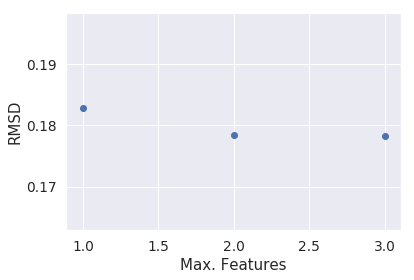

In [333]:
fig, ax = plt.subplots()
ax.scatter(model.cv_results_['param_max_features'].data,
          np.sqrt(-1 * model.cv_results_['mean_test_score']))
ax.set_xlabel('Max. Features')
ax.set_ylabel('RMSD')

In [334]:
model = model.best_estimator_


In [335]:
list(zip(X.columns,model.feature_importances_))

[('inst_per_warp', 0.6503418573768097),
 ('size', 0.008668440732237874),
 ('branch_efficiency', 0.0022661803642774316),
 ('warp_execution_efficiency', 0.09159172141031137),
 ('warp_nonpred_execution_efficiency', 0.24713180011636354)]

In [336]:
all_y_test = np.zeros((0,))
all_y_pred = np.zeros((0,))
#given options and list of data, returns the indices of training and test sets 
for train_inds, test_inds in ShuffleSplit(n_splits=5, test_size=0.1).split(X,y):
    # Split off the train and test set
    X_test, y_test = X.iloc[test_inds, :], y[test_inds]
    X_train, y_train = X.iloc[train_inds, :], y[train_inds]
    
    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Append the results
    all_y_test = np.concatenate((all_y_test, y_test))
    #print (all_y_test)
    all_y_pred = np.concatenate((all_y_pred, y_pred))

In [338]:
#from sklearn.metrics import median_absolute_error
#median_absolute_error(all_y_true, all_y_pred)

In [339]:
print ("R:",  sp.stats.pearsonr(all_y_test, all_y_pred)[0])
print ("MAE:", np.abs(all_y_test - all_y_pred).mean(), 's')
print ("RMSE:", np.sqrt(np.power(all_y_test - all_y_pred, 2).mean()), 's')

R: 0.9929705423504279
MAE: 0.009278167685075462 s
RMSE: 0.03170434102099781 s


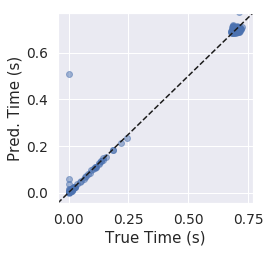

In [340]:
fig, ax = plt.subplots()

# Make the plot
ax.scatter(all_y_test, all_y_pred, alpha=0.5)

# Make it pretty
ax.set_xlim(ax.get_xlim())
ax.set_ylim(ax.get_xlim())

ax.set_xlabel('True Time (s)')
ax.set_ylabel('Pred. Time (s)')

fig.set_size_inches(3.5, 3.5)

# Add in the goal line
ax.plot(ax.get_xlim(), ax.get_ylim(), 'k--');

# Trimming down features

## Creating model with features with importance of >= 5

In [341]:
feature_importance = list(zip(X.columns,model.feature_importances_))
correlation = (df.corr()["Time(s)"])

In [342]:
#print(feature_importance)
print ((correlation))

size                                     0.350447
inst_per_warp                           -0.608651
branch_efficiency                        0.282718
warp_execution_efficiency                0.418522
warp_nonpred_execution_efficiency        0.286639
inst_replay_overhead                     0.657293
shared_load_transactions_per_request    -0.746547
shared_store_transactions_per_request   -0.732503
local_load_transactions_per_request           NaN
local_store_transactions_per_request          NaN
gld_transactions_per_request            -0.632585
gst_transactions_per_request            -0.476210
shared_store_transactions               -0.422449
shared_load_transactions                -0.421852
local_load_transactions                       NaN
local_store_transactions                      NaN
gld_transactions                        -0.421992
gst_transactions                        -0.512828
sysmem_read_transactions                      NaN
sysmem_write_transactions                     NaN


## Creating feature list dependent on set threshold

In [349]:
# Change threshold
def feature_list(threshold):

    all_met = df.columns.values
    #print(combined_data_["metrics"])
    #print (correlation[-0.929979])
    needed_features = []
    for m in all_met:
        if correlation[m] >= threshold or correlation[m] <= (-1)*threshold:
            needed_features.append(m)
    needed_features.remove("Time(s)")
    return (needed_features)
 
    
 
   

In [350]:
import numpy as np
list_fea = {}
count = 0
for i in np.arange(.5,1,0.1):
    i = format(i,'.1f')
    key = "feature_" + str(i)
    #print (key)
    list_fea["feature_" + str(i)] = feature_list(float(i))
    print(len(list_fea["feature_" + str(i)]))
print("Number of features from (+-).5 to (+-).9 correlation values")

43
37
29
7
2
Number of features from (+-).5 to (+-).9 correlation values


In [351]:
feature_95 = feature_list(.95)
feature_97 = feature_list(.97)
print(feature_95)

[]


## Run model function - takes in list of features to use

In [352]:
import pandas as pd
%matplotlib inline

def run_model(cur_features,num_features):   
    df = pd.DataFrame.from_dict(combined_data_,orient="index")
    #display(df.head())
    df = df.dropna()
    X = df[cur_features]
    y = df['Time(s)']
    #df = df.dropna()

    #print (df)
    print ("X size:", X.shape)
    print ('y size:', y.shape)
    model = GridSearchCV(RandomForestRegressor(n_estimators=100),
                         param_grid=dict(max_features=range(2,num_features)),
                         scoring='neg_mean_squared_error',
                        cv=10)
    model.fit(X,y)
    model.fit(X,y)
    all_y_test = np.zeros((0,))
    all_y_pred = np.zeros((0,))
    #given options and list of data, returns the indices of training and test sets 
    for train_inds, test_inds in ShuffleSplit(n_splits=5, test_size=0.1).split(X,y):
        # Split off the train and test set
        X_test, y_test = X.iloc[test_inds, :], y[test_inds]
        X_train, y_train = X.iloc[train_inds, :], y[train_inds]

        # Train the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Append the results
        all_y_test = np.concatenate((all_y_test, y_test))
        #print (all_y_test)
        all_y_pred = np.concatenate((all_y_pred, y_pred))

    print ("R:",  sp.stats.pearsonr(all_y_test, all_y_pred)[0])
    print ("MAE:", np.abs(all_y_test - all_y_pred).mean(), 's')
    print ("RMSE:", np.sqrt(np.power(all_y_test - all_y_pred, 2).mean()), 's')

    fig, ax = plt.subplots()

    # Make the plot
    ax.scatter(all_y_test, all_y_pred, alpha=0.5)

    # Make it pretty
    ax.set_xlim(ax.get_xlim())
    ax.set_ylim(ax.get_xlim())

    ax.set_xlabel('True Time (s)')
    ax.set_ylabel('Pred. Time (s)')

    fig.set_size_inches(3.5, 3.5)

    # Add in the goal line
    ax.plot(ax.get_xlim(), ax.get_ylim(), 'k--');

## .5 Correlation Value

In [353]:
#print(list_fea["feature_0.5"])
run_model(list_fea["feature_0.5"],len(list_fea["feature_0.5"]))

X size: (593, 43)
y size: (593,)


KeyboardInterrupt: 

## .6 Correlation Value

In [ ]:
run_model(list_fea["feature_0.6"],len(list_fea["feature_0.6"]))

## .7 Correlation Value

In [ ]:
run_model(list_fea["feature_0.7"],len(list_fea["feature_0.7"]))

## .8 Correlation Value

In [ ]:

run_model(list_fea["feature_0.8"],len(list_fea["feature_0.8"]))

## .9 Correlation Value

X size: (559, 25)
y size: (559,)
R: 0.9894176103879546
MAE: 0.005117049710346729 s
RMSE: 0.030954394391209235 s


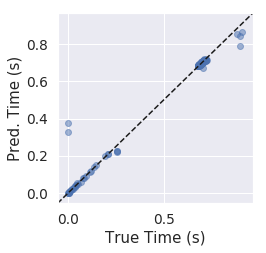

In [283]:
#print(list_fea["feature_0.5"])
run_model(list_fea["feature_0.9"],len(list_fea["feature_0.9"]))

## .95 Correlation Value

X size: (559, 7)
y size: (559,)
R: 0.9829568184051248
MAE: 0.0060143631275206754 s
RMSE: 0.045176258588377594 s


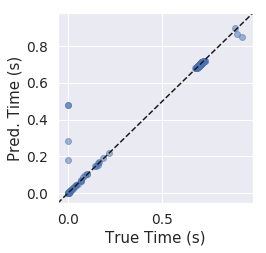

In [305]:
#len(feature_95)
run_model(feature_95,7)

## .97 Correlation Value

X size: (559, 3)
y size: (559,)
R: 0.9983252757188633
MAE: 0.0018728444482052904 s
RMSE: 0.014261931473296392 s


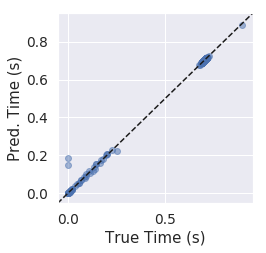

In [307]:
run_model(feature_97,len(feature_97))

## Plotting learning curve 
### Both training and test score improve and remain high throughout sampling size

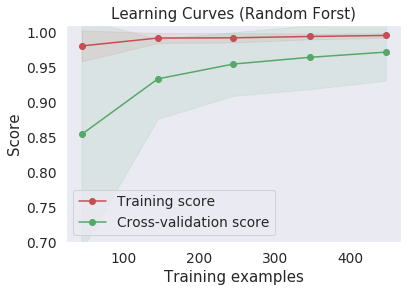

In [313]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


title = "Learning Curves (Random Forst)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = RandomForestRegressor()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

"""title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)"""

plt.show()

In [ ]:
## Using this, what can we do with k-means (transfer learning or performance prediction)